Prophet is a forecasting model by Facebook that forecasts time series using special adjustments for factors such as seasonality, holiday periods, and changepoints.

# Background

The dataset is sourced from the San Francisco International Airport Report on Monthly Passenger Traffic Statistics by Airline, which is available from data.world (Original Source: San Francisco Open Data) as indicated in the References section below.
Specifically, adjusted passenger numbers for the airline KLM (enplaned) are filtered as the time series for analysis from the period May 2005 to March 2016.

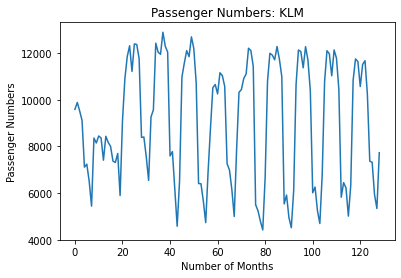

As we can see, the time series shows quite a stationary pattern (one where there is a constant mean, variance and autocorrelation.

We will not formally test for this condition here, but it is also evident that there appears to be significant seasonality present in the dataset — i.e. significant shifts in the time series trend that occur at certain time intervals.

From a visual inspection of the time series, it would appear that this shift happens approximately every eight months or so.

Seasonality is a common characteristic of time series.

It can appear in two forms: additive and multiplicative.

In the former case the amplitude of the seasonal variation is independent of the level, whereas in the latter it is connected.

The following figure highlights this:

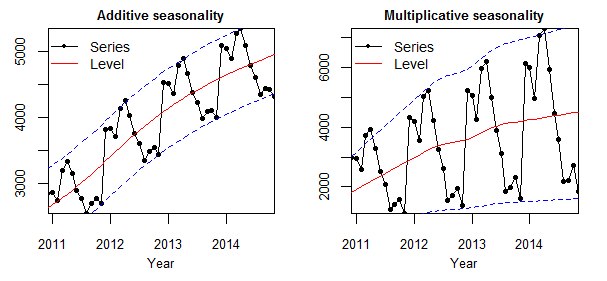

Note that in the example of multiplicative seasonality the season is becoming “wider”. Obviously if the level was decreasing the seasonal amplitude of the multiplicative case would decrease as well.

For selecting the appropriate model to produce our forecasts we need to know the type of seasonality we are dealing with.

How do you compare against statistical identification?

Select additive or multiplicative in the demonstration below and submit your choice to see if you can do better than statistics and the average accuracy of participants so far.

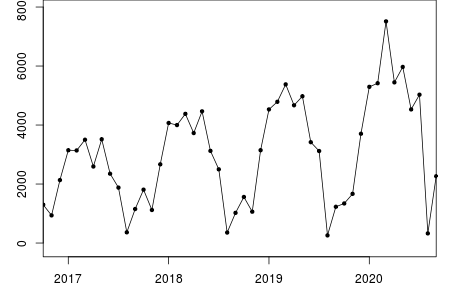

Answer : Multiplicative

In [10]:
import pandas as pd

In [11]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['Date']
train_dataset['y']= train_df['Adjusted Passenger Count']
train_dataset.head(115)

NameError: name 'train_df' is not defined

Here is the dataframe that will be used as the test set (the part of the time series we are trying to predict), with the time interval defined as monthly:

In [12]:
future = prophet_basic.make_future_dataframe(periods=14, freq='M')
future.tail(15)

NameError: name 'prophet_basic' is not defined

In [5]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

NameError: name 'Prophet' is not defined

In [7]:
forecast = prophet_basic.predict(future)
fig1 = prophet_basic.plot(forecast)

NameError: name 'prophet_basic' is not defined

In [8]:
fig1 = prophet_basic.plot_components(forecast)

NameError: name 'prophet_basic' is not defined

# Some observations:

We can see that there is a significant growth in the trend from 2007 up until 2009, with passenger numbers levelling off after that.
We also observe that passenger numbers appear to be highest from approximately May — September, after which we see a dip in numbers for the rest of the year.
Note that we observed visually that seasonality appears to be present in the dataset. However, given that we are working with a monthly dataset — we will not use Prophet to explicitly model seasonality in this instance.
There are two reasons for this:
Detection of seasonality would be more accurate if we were using daily data — but we are not in this case.
Making an assumption of yearly seasonality may not be particularly accurate in this case. Inspecting the dataset shows that while certain seasonal shifts occur every year, others occur every 6 to 8 months. Therefore, explicitly defining a seasonality parameter in the model may do more harm than good in this instance.

# Changepoints

A changepoint represents a significant structural shift in a time series.
For instance, the big drop in air passenger numbers after the onset of COVID-19 would represent a significant structural shift in the data.
For instance, here is the indicated changepoints on the model when the appropriate parameter is set to 4.

In [9]:
pro_change = Prophet(n_changepoints=4)
forecast = pro_change.fit(train_dataset).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

NameError: name 'Prophet' is not defined

We see that the significant changepoint as indicated in the model lies between 2007–2009.
What is interesting is that while passenger numbers did see a significant decline for 2009 — numbers were still higher on average for this period than for 2005–2007, indicating that the overall demand for air travel (for KLM flights from San Francisco at least) actually grew towards the end of the decade.

# Model Validation

Now that the forecasting model has been built, the predicted passenger numbers are compared to the test set in order to determine model accuracy.
With the changepoint set to 4, we obtain the following error metrics:
Root Mean Squared Error: 524
Mean Forecast Error: 71

With a mean of 8,799 passengers per month — the errors are quite low in comparison to this figure — indicating that the model is performing well in forecasting monthly passenger numbers.
However, it is important to note that the model accuracy is significantly influenced by the changepoint parameter.
Let’s see what happens to the RMSE when the changepoints are modified.

We can see that the RMSE drops quite dramatically as more changepoints are introduced — but the RMSE is minimised at 4 changepoints.

# Conclusion

In this example, you have seen:

1. How Prophet can be used to make time series forecasts?
2. How to analyse trends and seasonal fluctuations using Prophet?
3. The importance of changepoints in determining model accuracy.

Hope you found this of use, and grateful for any thoughts or feedback!
You can access the code and datasets for this example at the MGCodesandStats repository as indicated below.